In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mnist = pd.read_csv("./datasets/mnist.csv")

In [2]:
# Split the labels from the data
mnist_labels = mnist["label"]
mnist_data = mnist.drop("label", axis=1)

In [3]:
# Split the data into training and validation sets
X_train_df, X_validation_df = train_test_split(mnist_data, test_size=0.2, random_state=42)
Y_train_df, Y_validation_df = train_test_split(mnist_labels, test_size=0.2, random_state=42)

In [4]:
# Validating that both train and validation sets have approximately the same distribution
print(((Y_train_df.value_counts() / Y_train_df.shape[0]) * 100).sort_index())
print(((Y_validation_df.value_counts() / Y_validation_df.shape[0]) * 100).sort_index())

label
0     9.869048
1    11.235119
2     9.913690
3    10.160714
4     9.622024
5     9.205357
6     9.976190
7    10.440476
8     9.607143
9     9.970238
Name: count, dtype: float64
label
0     9.714286
1    10.821429
2    10.071429
3    11.154762
4     9.988095
5     8.357143
6     9.345238
7    10.630952
8     9.940476
9     9.976190
Name: count, dtype: float64


In [5]:
Y_train_one_hotted = pd.get_dummies(Y_train_df)
Y_validation_one_hotted = pd.get_dummies(Y_validation_df)

In [6]:
# Transposing and Normalization
X_train, X_validation = np.array(X_train_df).transpose() / 255, np.array(X_validation_df).transpose() / 255
Y_train, Y_validation = np.array(Y_train_one_hotted).transpose(), np.array(Y_validation_one_hotted).transpose()

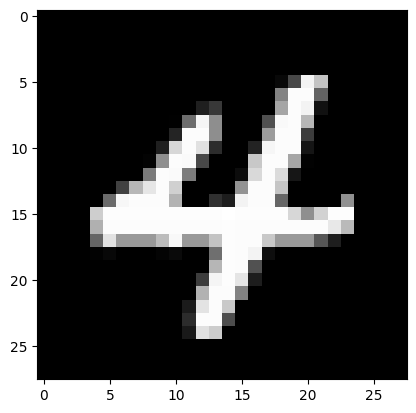

In [7]:
MANUAL_INDEX = 83
MNIST_IMAGE_SIDEֹֹ_LENGTH_PX = 28

def show_digit(dataset, index):
    plt.imshow(dataset[:, index].reshape(MNIST_IMAGE_SIDEֹֹ_LENGTH_PX, MNIST_IMAGE_SIDEֹֹ_LENGTH_PX), cmap='gray')
    plt.show()

show_digit(X_train, MANUAL_INDEX)

In [8]:
from neural_network import ArtificialNeuralNetwork, NeuralNetworkLayerInfo, ActivationFunctionType, LogLoss

LEARNING_RATE = 0.05
ITERATIONS = 1500

neural_net = ArtificialNeuralNetwork([NeuralNetworkLayerInfo(784, None),
                                      NeuralNetworkLayerInfo(16, ActivationFunctionType.RELU),
                                      NeuralNetworkLayerInfo(16, ActivationFunctionType.RELU),
                                      NeuralNetworkLayerInfo(10, ActivationFunctionType.SIGMOID)], LogLoss)

cost_history = neural_net.fit(X_train, Y_train, LEARNING_RATE, ITERATIONS)

Iteration number 0 - Cost: 7.774700988064837
Iteration number 100 - Cost: 1.7082755609911429
Iteration number 200 - Cost: 1.1964444102658125
Iteration number 300 - Cost: 0.9249181845200667
Iteration number 400 - Cost: 0.8154612954236722
Iteration number 500 - Cost: 0.7527693873613915
Iteration number 600 - Cost: 0.7084703671774721
Iteration number 700 - Cost: 0.6736457126653249
Iteration number 800 - Cost: 0.6445251920509011
Iteration number 900 - Cost: 0.6194451379455741
Iteration number 1000 - Cost: 0.5973401941790266
Iteration number 1100 - Cost: 0.5775166791688527
Iteration number 1200 - Cost: 0.5599708981484689
Iteration number 1300 - Cost: 0.5442896851017882
Iteration number 1400 - Cost: 0.5300499171551805


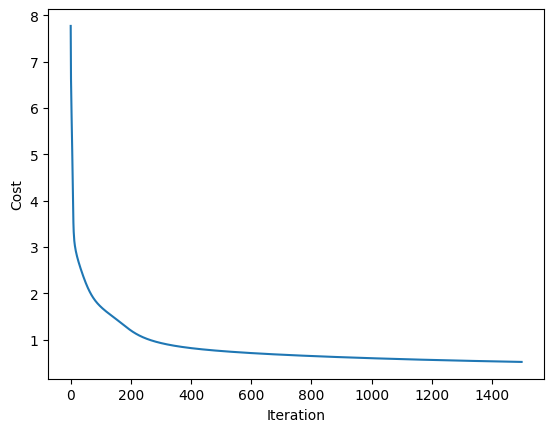

In [9]:
def plot_cost(cost_history):
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    
plot_cost(cost_history)

In [10]:
# Making predictions on the validation set
Y_predict = neural_net.predict(X_validation)

In [11]:
def accuracy(Y_predict, Y_ground):
    return (np.sum(Y_predict == Y_ground) / len(Y_ground)) * 100

print(accuracy(Y_predict.argmax(axis=0), Y_validation.argmax(axis=0)))

92.15476190476191


Correct label: 8
Predicted label: 8


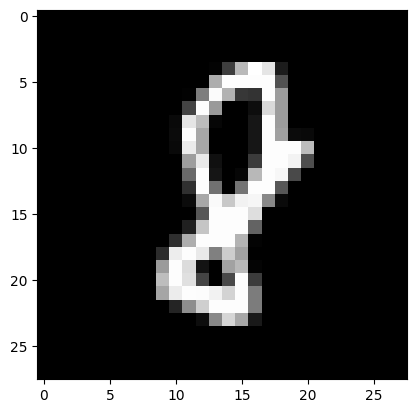

Correct label: 1
Predicted label: 1


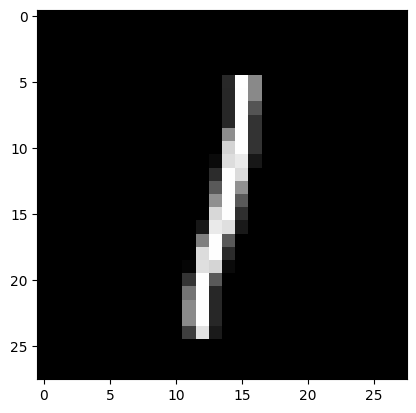

Correct label: 9
Predicted label: 9


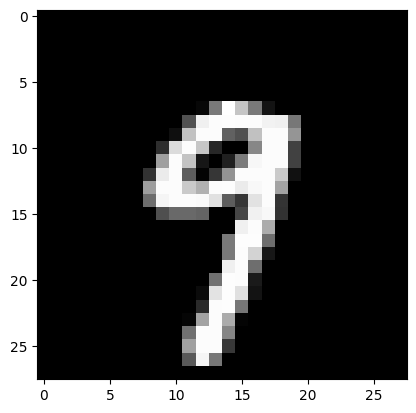

KeyboardInterrupt: 

In [12]:
# Showcase some of the predictions versus ground labels of the validation set
for i in range(100):
    print(f"Correct label: {Y_validation[:, i].argmax(axis=0)}")
    print(f"Predicted label: {Y_predict[:, i].argmax(axis=0)}")
    show_digit(X_validation, i)
    time.sleep(3)